In [67]:
from scipy.io import arff
from operator import index

import numpy as np
from sklearn.neighbors import NearestNeighbors, KernelDensity
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import gaussian_kde, multivariate_normal
import seaborn as sns
from sklearn import preprocessing
import math

from statsmodels.sandbox.panel.sandwich_covariance_generic import kernel

plt.rcParams['figure.figsize'] = [15, 7]

In [68]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t4-8k.arff')
df = pd.DataFrame(arff_file[0])

In [69]:
df.head()

,x,y,CLASS
0,68.601997,102.491997,b'0'
1,454.665985,264.808990,b'2'
2,101.283997,169.285995,b'noise'
3,372.614990,263.140991,b'2'
4,300.989014,46.555000,b'5'


In [70]:
X = df.iloc[:,:2].values
y = df.iloc[:,2]
le = LabelEncoder()
y = le.fit_transform(y)

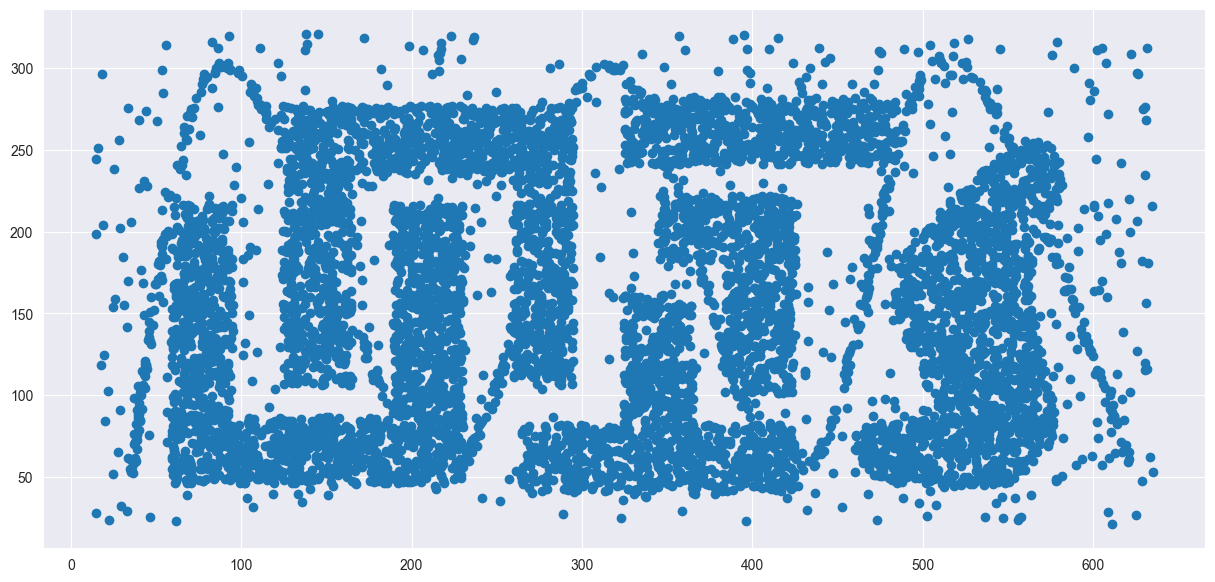

In [71]:
plt.scatter(X[:,0],X[:,1])

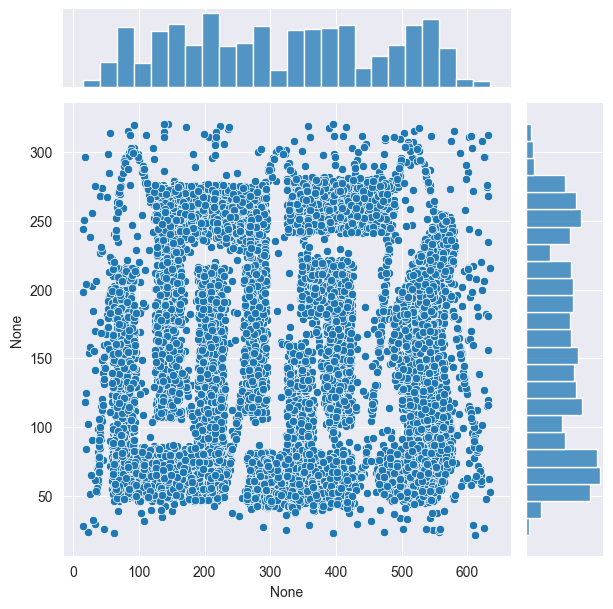

In [72]:
sns.jointplot(x= X[:,0],y=X[:,1],data=df)
plt.show()

In [73]:
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,2)

In [74]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum': # min + median + max
            arr += [x[1]+np.max(x)+np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x)+x[1]]
        elif median == 'medMax':
            arr += [np.median(x)+np.max(x)]
        elif median == 'min':
            arr += [x[1]]
            

    return arr

distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="max")

In [75]:
q3 = np.quantile(arr, 0.75)
size = 100
spaced = np.linspace(0,320,num=size)

0.00011727435283509646
0.0001284117932132769


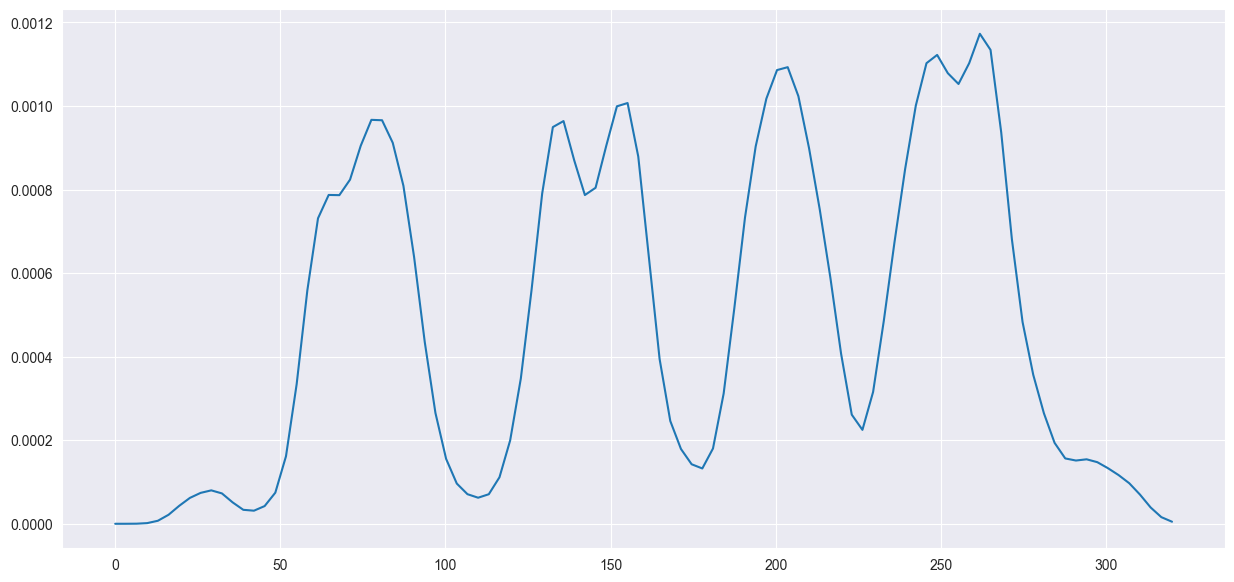

In [95]:
#density function
pdf = np.array([])
totalPdf = []
mean1 = np.mean(X[:,0])
mean2 = np.mean(X[:,1])
sigma = q3*3

for a in range(X.shape[0]):
    for t in spaced:
        w = pow((t-X[a][0]),2)
        q = pow((t-X[a][1]),2)
        expTotal = -((w+q) / (2*pow(sigma,2)))
        e = math.exp(expTotal)
        bottom = (2*math.pi) * (pow(sigma,2))
        bottomR = 1 / bottom
        density = bottomR * e
        pdf = np.append(pdf,density)
    
    pdf = pdf / size
    totalPdf += [list(pdf)]
    pdf = np.array([])

#print(np.sum(totalPdf[625]))
arrToHold = []
kernelAdd = list(map(sum,zip(*totalPdf)))
print(max(kernelAdd)*.1)

sumDen = []
for r in totalPdf:
    sumDen += [np.sum(r)]

print(max(sumDen))

plt.plot(spaced,kernelAdd)
plt.show()

In [77]:
newK = gaussian_kde(X.T)

In [78]:
newPoints = newK.evaluate(X.T)

In [79]:
print(newPoints)

[5.95462436e-06 7.88949029e-06 6.88149312e-06 ... 7.21423870e-06
 1.06696901e-05 7.41692649e-06]


6
[25, 44, 62, 123, 130, 143, 164, 186, 217, 232, 235, 255, 259, 264, 302, 360, 363, 370, 372, 373, 376, 422, 426, 440, 472, 521, 534, 543, 587, 599, 610, 621, 622, 624, 629, 650, 683, 685, 692, 723, 730, 749, 778, 827, 842, 896, 900, 917, 937, 955, 956, 971, 990, 994, 1009, 1021, 1030, 1034, 1044, 1060, 1086, 1116, 1136, 1142, 1145, 1175, 1176, 1179, 1187, 1191, 1197, 1209, 1221, 1251, 1257, 1274, 1283, 1328, 1347, 1376, 1396, 1405, 1408, 1413, 1421, 1438, 1457, 1499, 1502, 1526, 1551, 1561, 1575, 1577, 1580, 1588, 1613, 1648, 1656, 1660, 1676, 1685, 1710, 1746, 1756, 1773, 1806, 1842, 1903, 1910, 1946, 1955, 1956, 1983, 1986, 1992, 1994, 2002, 2007, 2017, 2040, 2056, 2070, 2075, 2097, 2104, 2143, 2146, 2163, 2200, 2281, 2302, 2342, 2357, 2379, 2386, 2431, 2432, 2433, 2465, 2470, 2497, 2525, 2529, 2552, 2556, 2564, 2592, 2642, 2674, 2709, 2732, 2754, 2768, 2769, 2774, 2811, 2859, 2951, 2955, 2970, 2993, 2999, 3014, 3018, 3027, 3034, 3036, 3039, 3062, 3064, 3075, 3102, 3108, 3138, 3156

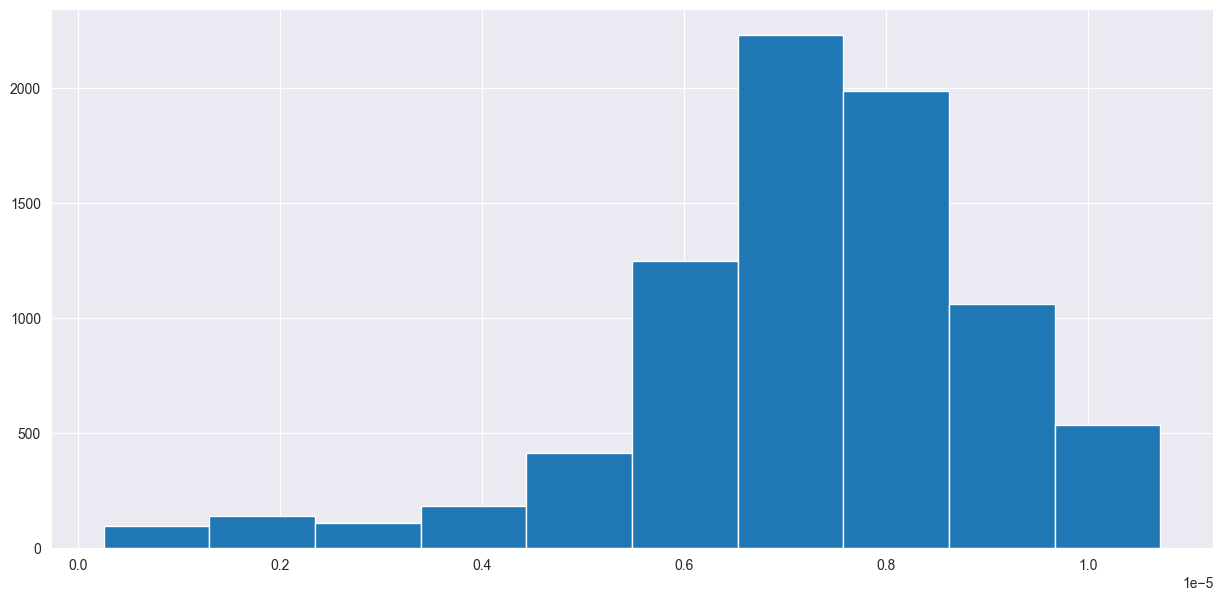

In [80]:
Z = np.max(newPoints)*.4
points = newPoints[newPoints < Z]
holder = []
for p in points:
    holder += [list(newPoints).index(p)]
print(y[holder[5]])
print(holder)
plt.hist(newPoints)
plt.show()

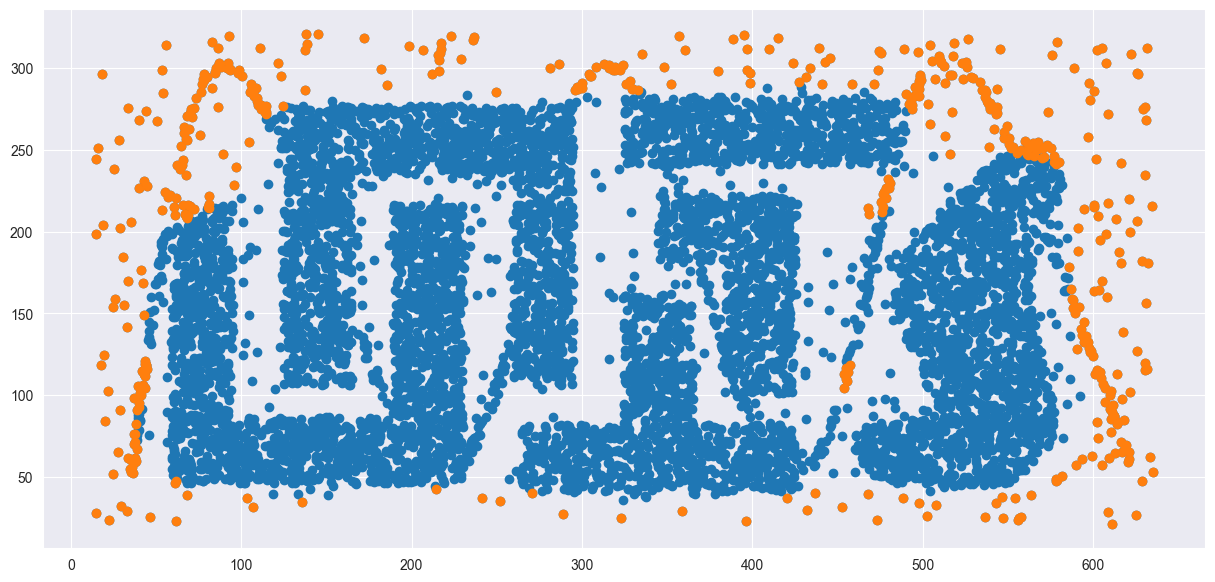

In [81]:
holderVals = []
for tm in holder:
    holderVals += [X[tm]]

holderVals = np.array(holderVals)
plt.scatter(X[:,0],X[:,1])
plt.scatter(holderVals[:,0],holderVals[:,1])
plt.show()